# Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# TODO:
1.            Data Ingestion with training / validation / test splits

2.            Exploratory Data Analysis - visualisation of key variables

3.            Feature Engineering / Data Transformation

4.            Model Creation - 2 different types of models of your choice

5.            Results interpretation and submission to Kaggle

6.            PowerPoint Presentation of analysis

# Metric:
- Use Root-Mean-Squared-Error

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import torch

import warnings
warnings.filterwarnings('ignore')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

pd.set_option("display.float_format", lambda x: "{:.3f}".format(x)) #Limiting floats output to 3 decimal points
pd.set_option("display.max_columns", None)

# Load the Data
## Training Data

In [2]:
train_data = pd.read_csv("Data/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Testing Data

In [3]:
test_data = pd.read_csv("Data/test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA
- Describe the data to see how many of each feature are in the data frame. This can be used to see missing data, ID and the shape of the item should match and each count should match the ID. If they do not match then there's missing data.
- Min and Max allow us to see the range of values that we will be working with and can be useful for later analysis.
- Using mean and 50% (median) we can see if the values are roughly where they need to be as the mean and median should be close enough to each other.

## Describe

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


As we can see from the above table:
- We have some missing values.
- Some columns such as 'MasVnrArea' have interesting values that may need to be looked into.
- We will also have to compare the min and max values of each feature to the ones described in the data_description.txt

In [5]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


## Duplicates
Although it doesn't seem to be the case as the ID matches the shape of the data, we should check if there's any duplicate data.

In [6]:
train_data.duplicated().sum()

0

## Missing Values
Next is missing data as we know that some values are missing as they dont match the count of the ID. This could be for many reasons such as N/A being a choice to select, in this dataset that could be used if the property doesn't have a Garage etc.
We should first find the data that is missing and then use the information around the data and from the data_description.txt to choose an appropriate action.

<AxesSubplot:>

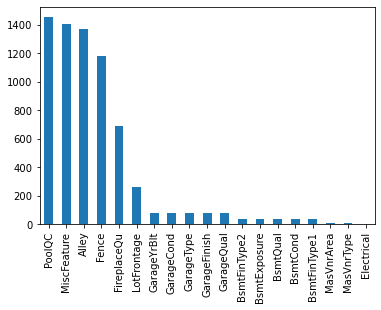

In [7]:
train_missing_values = train_data.isnull().sum().sort_values(ascending=False)
train_missing_values = train_missing_values[train_missing_values > 0]

test_missing_values = test_data.isnull().sum().sort_values(ascending=False)
test_missing_values = test_missing_values[test_missing_values > 0]

train_missing_values.plot.bar()

<AxesSubplot:>

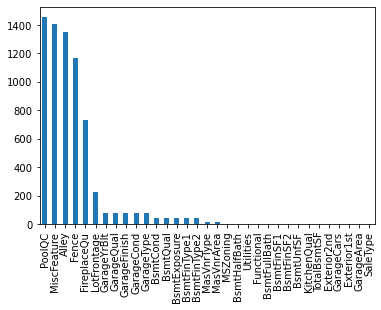

In [8]:
test_missing_values.plot.bar()

Checking both train and test we can see that PoolQC has the most missing data along with MiscFeature, Alley, Fence, FireplaceQU ... This tells me that it is most likely not 'missing' data but something that describes the data, for instance if a property has a pool, an alley, if its fenced off, or if it has a fireplace. Using the data_description.txt we can find out more about these features.

As suspected, PoolQC has a NA property that means there's No pool, same with Fence, Alley, FireplaceQU, and MiscFeature. 
This is good information as we can reduce the amount of 'missing' data by changing the NA entries to something more fitting.

Let's show this in a more numerical format

In [9]:
missing_data = pd.concat([train_missing_values,
                         test_missing_values,
                         train_missing_values/len(train_data),
                         test_missing_values/len(test_data)], axis=1)

missing_data.rename({0: "train_missing",
                     1: "test_missing",
                     2: "train_missing percentage",
                     3: "test_missing percentage"}, axis='columns')

,train_missing,test_missing,train_missing percentage,test_missing percentage
PoolQC,1453.000,1456.000,0.995,0.998
MiscFeature,1406.000,1408.000,0.963,0.965
Alley,1369.000,1352.000,0.938,0.927
Fence,1179.000,1169.000,0.808,0.801
FireplaceQu,690.000,730.000,0.473,0.500
LotFrontage,259.000,227.000,0.177,0.156
GarageYrBlt,81.000,78.000,0.055,0.053
GarageCond,81.000,78.000,0.055,0.053
GarageType,81.000,76.000,0.055,0.052
GarageFinish,81.000,78.000,0.055,0.053


From this we can see a few things we may not have noticed in the bar charts, the first being that other than the features we were already aware of, we can see that in the test data has values missing that the train data does not.

## SalePrice - Analysis
SalePrice is the focus of this data and is what we want to be able to (accurately) predict the SalePrice for unseen data. To do this we need to see the relationship between the SalePrice and the other features as well as check the distribution of the values in SalePrice as in the description (further up) on the data, we noticed that the mean is quite a bit bigger than the median which could indicate that the data has a positive skew.

In [10]:
train_data['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

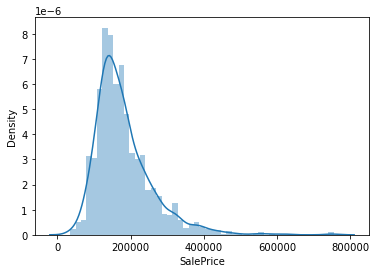

In [11]:
sns.distplot(train_data['SalePrice'])

The reason we check for skew is because if we train a model on the above, then the model well perform better at predicting houses with lower SalePrices. It also allows us to know roughly where outliers will be, in this case since it is a positive skew we know that the outliers will be to the right.

In [12]:
print(f"Skewness: {train_data['SalePrice'].skew()}")
print(f"Kurtosis: {train_data['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


The Kurtosis value allows us to compare our distribution to a normal distribution, as a normal distribution has a kurtosis value of 3. Since our value is greater than 3 we know our data has more outliers than a general distribution.

Now that we have the Skewness and Kurtosis values, we can move onto the relationship between the SalePrice and the numerical features to see if there's any information we can gain from it.

## Numerical feature relationships - Quantitative
The first thing we want to do with our quantitative data is to find features that closely resemble our distribution of the SalePrice as this shows that the features could share a relationship.
As the data is varying in values we will just normalise the data and then plot the distribution of each feature with the SalePrice distribution laid over it so we can quickly see what features may have an impact on the 'SalePrice'

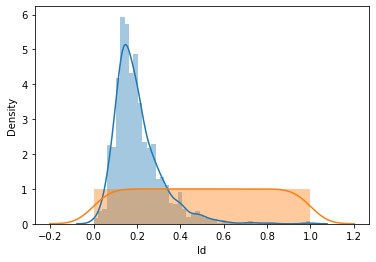

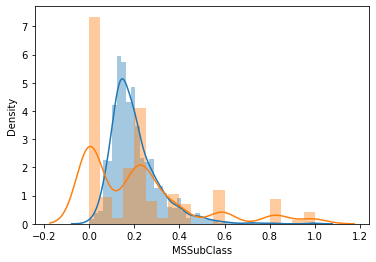

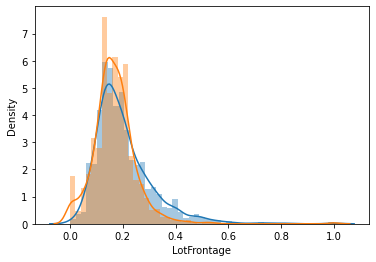

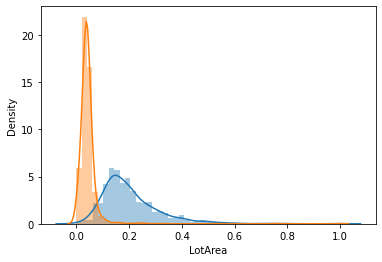

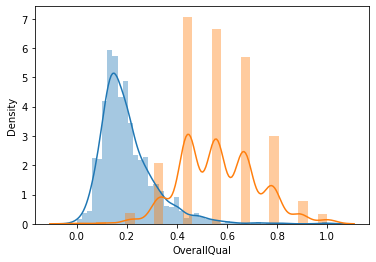

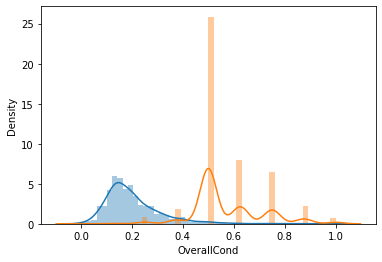

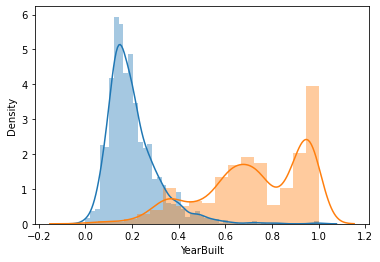

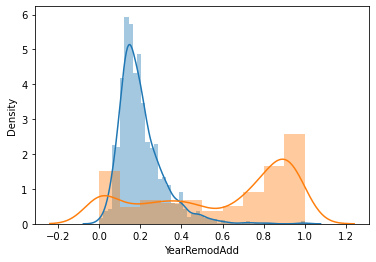

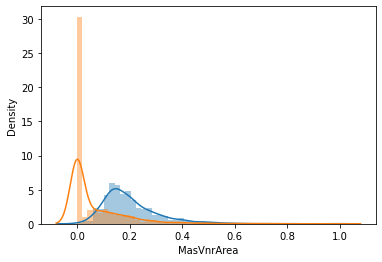

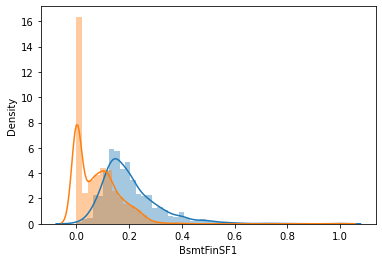

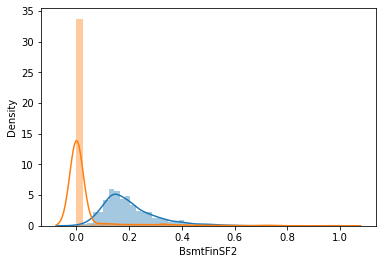

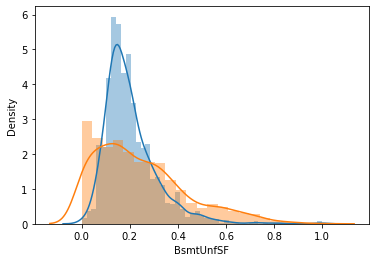

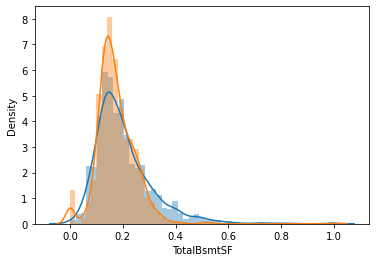

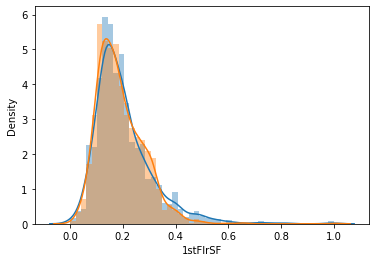

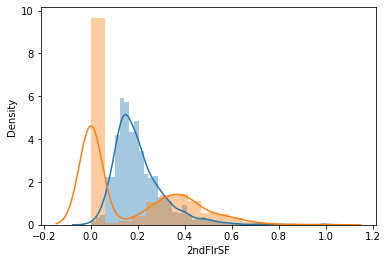

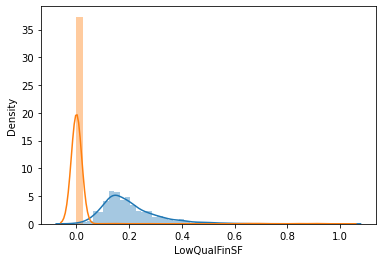

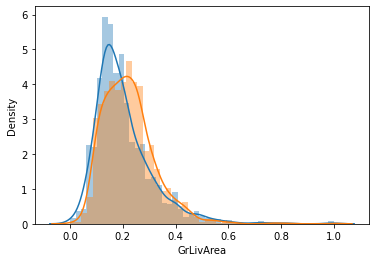

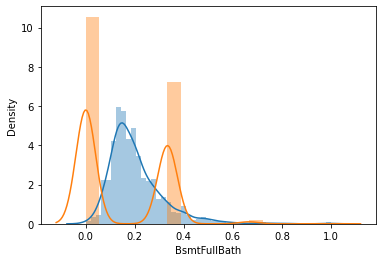

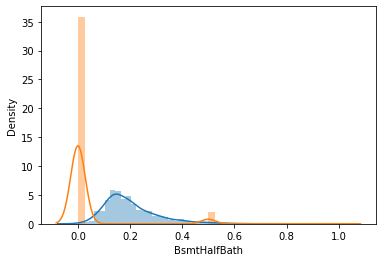

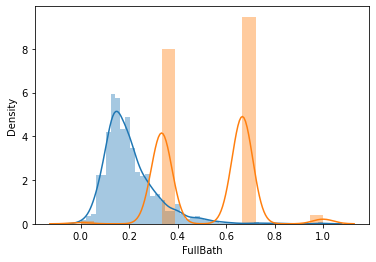

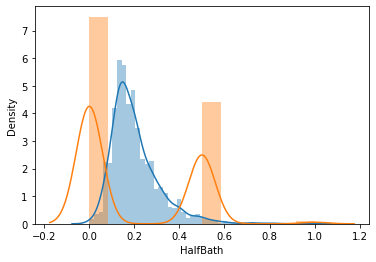

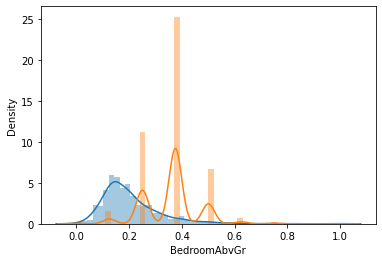

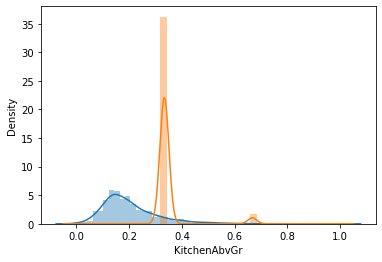

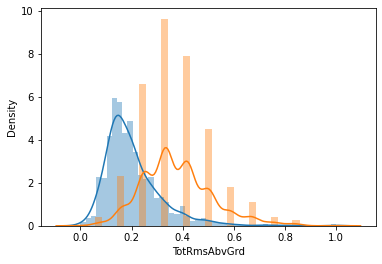

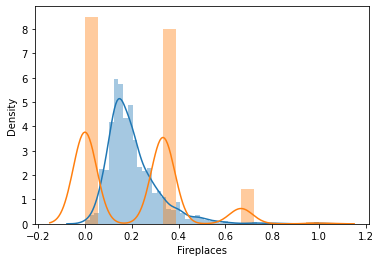

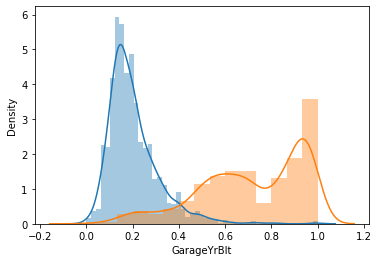

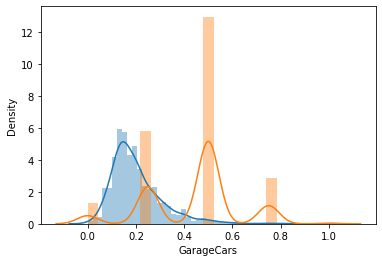

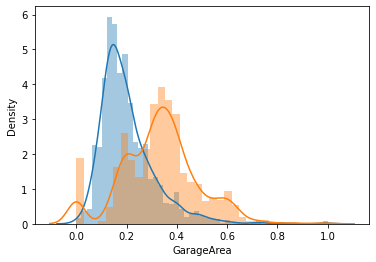

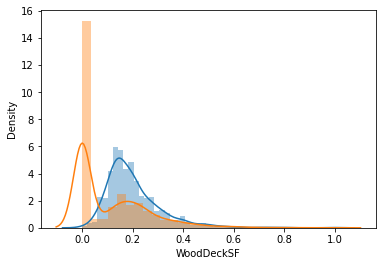

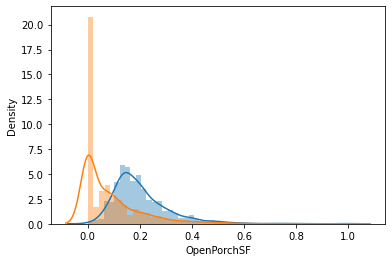

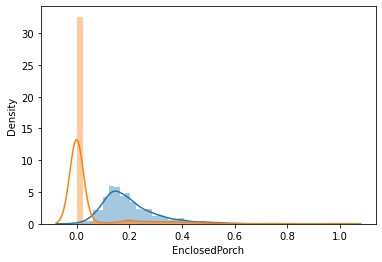

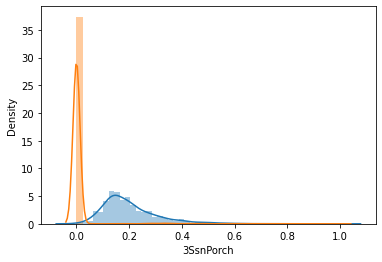

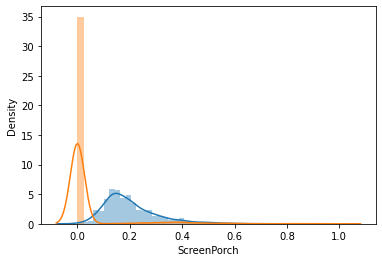

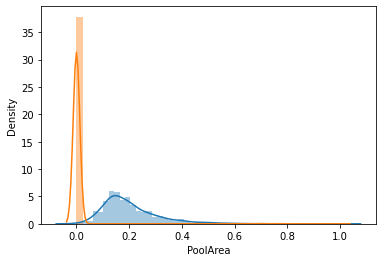

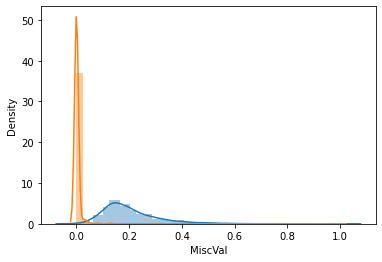

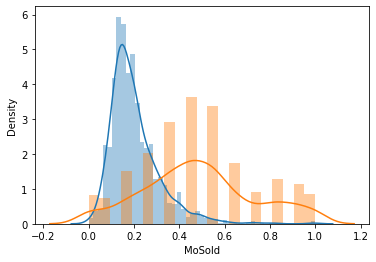

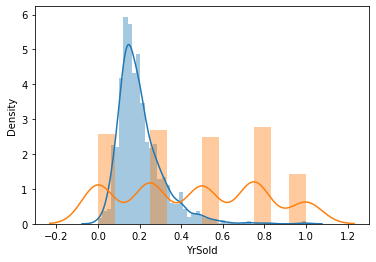

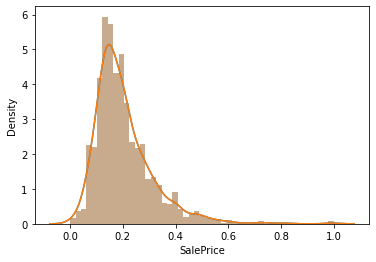

In [13]:
quantitative = train_data.select_dtypes(exclude="object")
norm_data =(quantitative-quantitative.min())/(quantitative.max()-quantitative.min())
for column in norm_data:
    plt.figure()
    sns.distplot(norm_data['SalePrice'])
    sns.distplot(norm_data[column])
    

There seems to be 4 features that closely represent the distribution of our 'SalePrice', there could be even more such as 'GarageArea' that can have a greater impact on the outcome of the 'SalePrice' but we can come back and add other features later if needed.

The four features:
- LotFrontage
- TotalBsmtSF
- 1stFlrSF
- GrLivArea

Secondary (maybe) features:
- BsmtFinSF1
- BsmtUnfSF
- GarageArea
- WoodDeckSF

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

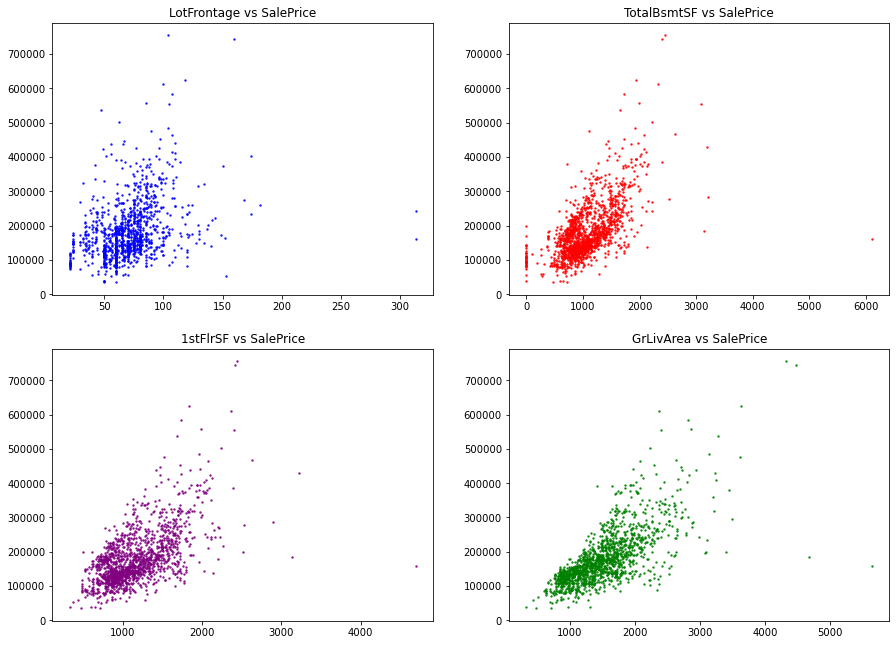

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15,11))
axs[0,0].plot(train_data['LotFrontage'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75, color='blue')
axs[0,0].set_title('LotFrontage vs SalePrice')
axs[0,1].plot(train_data['TotalBsmtSF'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75 , color='red')
axs[0,1].set_title('TotalBsmtSF vs SalePrice')
axs[1,0].plot(train_data['1stFlrSF'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75 , color='purple')
axs[1,0].set_title('1stFlrSF vs SalePrice')
axs[1,1].plot(train_data['GrLivArea'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75, color='green')
axs[1,1].set_title('GrLivArea vs SalePrice')

From the scatterplots we can see that there's some exponential and linear relationships between the features and the SalePrice. However the LotFrontage doesn't seem to have a distinct relationship between SalePrice. 
Also from this scatter plot we can see some outliers.

I will also check the relationship between the secondary features I have selected to see if there's a relationship between SalePrice.

Text(0.5, 1.0, 'WoodDeckSF vs SalePrice')

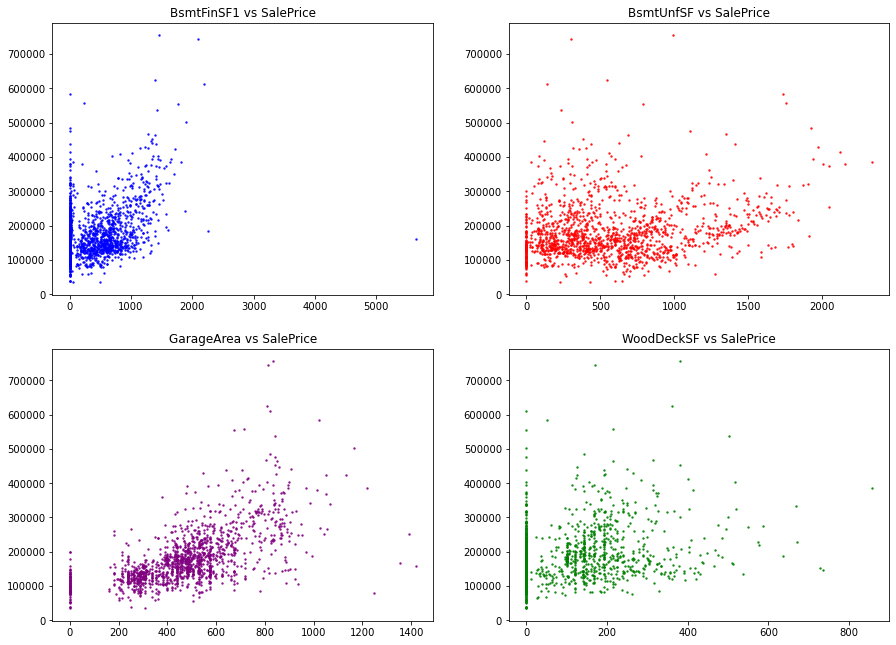

In [15]:
fig, axs = plt.subplots(2,2, figsize=(15,11))
axs[0,0].plot(train_data['BsmtFinSF1'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75, color='blue')
axs[0,0].set_title('BsmtFinSF1 vs SalePrice')
axs[0,1].plot(train_data['BsmtUnfSF'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75 , color='red')
axs[0,1].set_title('BsmtUnfSF vs SalePrice')
axs[1,0].plot(train_data['GarageArea'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75 , color='purple')
axs[1,0].set_title('GarageArea vs SalePrice')
axs[1,1].plot(train_data['WoodDeckSF'], train_data['SalePrice'], marker="o", linestyle="", markersize=1.5, alpha=0.75, color='green')
axs[1,1].set_title('WoodDeckSF vs SalePrice')

As we can see these secondary features are not as 'clean' as the primary ones selected, however BsmtFinSF1 seems to show an exponential relationship and GarageArea seems to show a Linear realtionship. For now I will not be using the secondary features but I may use BsmtFinSF1 and GarageArea later if I find that the model performs better with including these features.

So the features that will be used are:
- TotalBsmtSF
- 1stFlrSF
- GrLivArea

## Categorical feature relationships - Qualitative
Now that we have found some qualitative data that may help in predicting the SalePrice we still need to find categorical or qualitative features that will also help in predicting the SalePrice.

For this we are looking at boxplots to see if there is a relationship between the categorical data and the saleprice, this will be done by seeing if there is a visual separation between the categories as the price increases.

In [16]:
#for column in train_data:
#    plt.figure()
#    sns.boxplot(data = train_data, x=column, y='SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

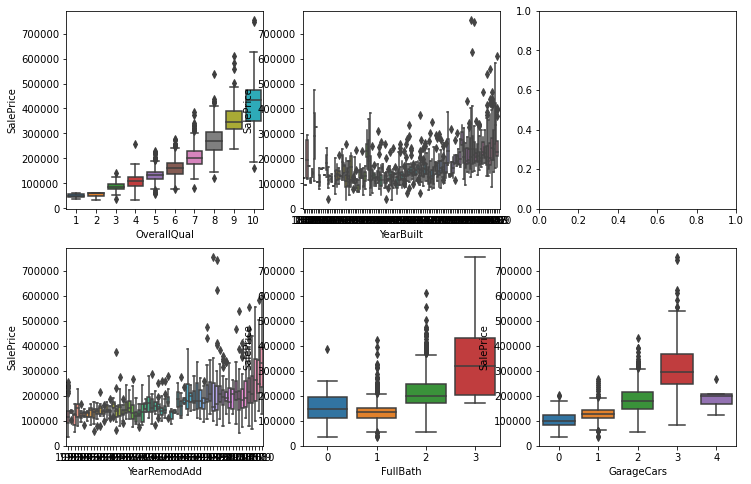

In [17]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

sns.boxplot(ax=axes[0,0], data=train_data, x='OverallQual', y='SalePrice')
sns.boxplot(ax=axes[0,1], data=train_data, x='YearBuilt', y='SalePrice')
sns.boxplot(ax=axes[1,0], data=train_data, x='YearRemodAdd', y='SalePrice')
sns.boxplot(ax=axes[1,1], data=train_data, x='FullBath', y='SalePrice')
sns.boxplot(ax=axes[1,2], data=train_data, x='GarageCars', y='SalePrice')

From looking at the boxplot I have decided that these features show some relationship between saleprice. For the purpose of saving space I will comment out the code used to loop through all the features and just show the following features: 
- OverallQual
- YearBuilt
- YearRemodAdd
- FullBath
- GarageCars

Next to check the relationships we have I will put the dataset through a correlation matrix and then a correlation matrix for the SalePrice, this way we can ensure that the data that we have selected is correlated to SalePrice. 
I decided to do this after rather than before as this way allows me to get familiar with the data and visually see correlation between features and the target. This way I don't blindly select the features that the matrix suggests.

## Correlation matrix

<AxesSubplot:>

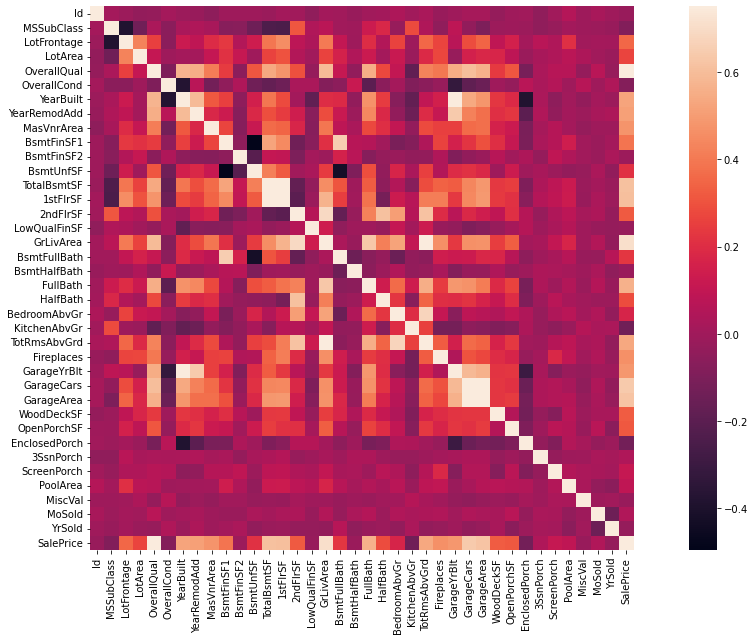

In [18]:
correlation_matrix = train_data.corr()

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation_matrix, vmax=0.75, square=True)

The brighter the square the higher the correlation, from this we can see that there are a few features that seem to be highly correlated with each other.
## SalePrice Correlation Matrix

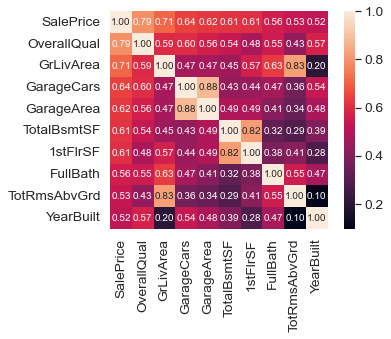

In [19]:
n = 10
cols = correlation_matrix.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

From this correlation matrix we can take away that the top 10 features that have a strong correlation to SalePrice are:
- OverallQaul  O
- GrLivArea    O
- GarageCars   O
- GarageArea   ~
- TotalBsmtSF  O
- 1stFlrSF     O
- FullBath     O
- TotRmsAbvGrd X
- YearBuilt    O

As we can see, we selected quite a few of the highly correlated features and now we also know that the GarageArea we had previously selected as a secondary feature is in fact correlated with SalePrice. So we can choose to include that if we so wish.
Now looking back at the correlation between these features we notice that Garage Area and Garage Cars are highly correlated, which is to be expected. On top of this, TotalBsmtSF and 1stFlrSF are highly correlated along with TotRmsAbvGrd and GrLivArea.
These suggest something about the data, which looking at the features becomes quite obvious. The number of cars you can fit in the garage is based on the garage area. So a few of these features are made somewhat redundant by others, to fix this we just choose the features that are highly correlated with the sale price and ignore the other. 
That leaves us with:
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF
- FullBath
- YearBuilt

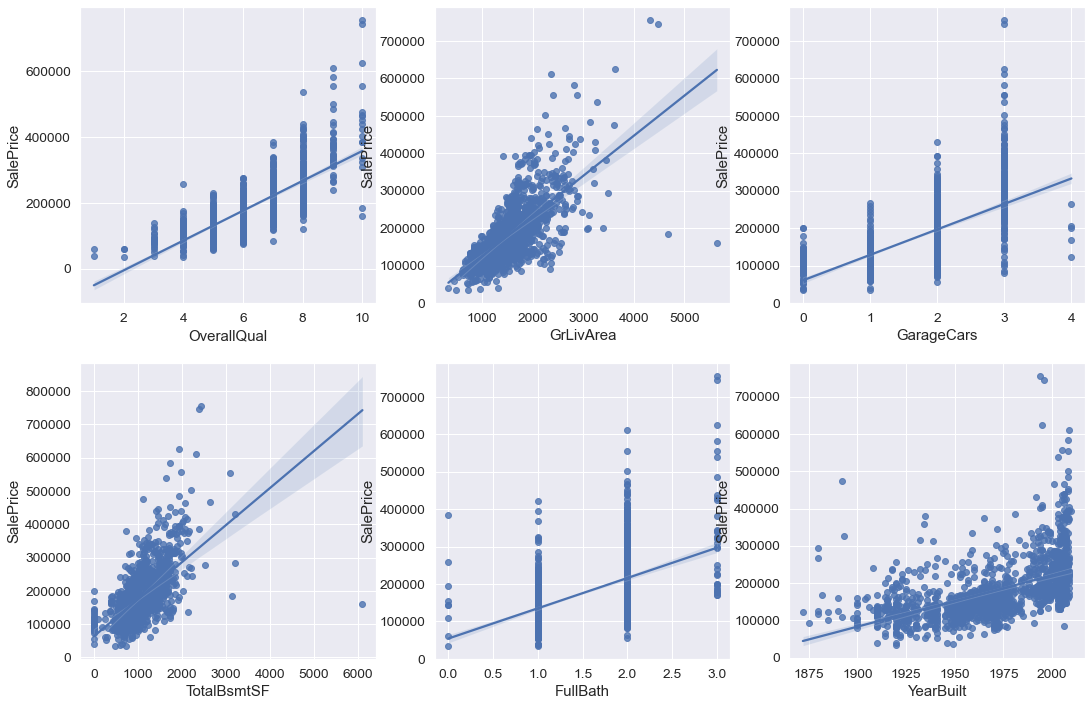

In [20]:
features_data = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
fig, ax = plt.subplots(round(len(features_data) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_data) - 1:
        sns.regplot(x=features_data[i], y='SalePrice', data=train_data[features_data], ax=ax)

# Data Processing
## Outliers

There are a couple of outliers that I can see from the above plots. The first one in TotalBsmtSF to the right and two in GrLivArea

In [21]:
print(f"Before: {train_data.shape}")
outlier_index = train_data[(train_data["GrLivArea"] > 4000) & (train_data["SalePrice"] < 200000)].index
train_data = train_data.drop(outlier_index)

outlier_index = train_data[(train_data["TotalBsmtSF"] > 5000) & (train_data["SalePrice"] < 200000)].index
train_data = train_data.drop(outlier_index)
print(f"After: {train_data.shape}")

Before: (1460, 81)
After: (1458, 81)


## Solving Missing Values
To solve the mass amount of missing values we will have to refer back to the data_description.txt file and choose an appropriate value to replace the NA values. This could be dropping it from the table, replacing it with another value, replacing it with the mean value.

- PoolQC - NA -> none
- MiscFeature - NA -> none
- Alley - NA -> none
- Fence - NA -> none
- FireplaceQu - NA -> none
- GarageType - NA -> none
- GarageFinish - NA -> none
- GarageCond - NA -> none
- GarageQual - NA -> none
- GarageYrBlt - 1980
- GarageArea - 0
- GarageCars - 0
- BsmtExposure - NA -> none
- BsmtFinType2 - NA -> none
- BsmtFinType1 - NA -> none
- BsmtCond - NA -> none
- BsmtQual - NA -> none
- BsmtFullBath - 0
- BsmtHalfBath - 0
- BsmtUnfSF - 0
- BsmtFinSF2 - 0
- BsmtFinSF1 - 0
- TotalBsmtSF - 0
- MasVnrArea - 0
- MasVnrType - None -> none

Now with all these values we don't actually need to replace them all as we are only focused on 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice' and everything else is unimportant. However for the sake of this I shall replace all the values.

We need to come up with a suitable replacement for GarageYrBlt. Since we are not using this feature it doesn't really matter what year we input, so I have chosen 1980 the median value.

In [22]:
replacements = {
    "PoolQC": "None",
    "MiscFeature": "None",
    "Alley": "None",
    "Fence": "None",
    "FireplaceQu": "None",
    "GarageType": "None",
    "GarageFinish": "None",    
    "GarageCond": "None",
    "GarageQual": "None",
    "GarageYrBlt": 1980.0,
    "GarageArea": 0,
    "GarageCars": 0,
    "BsmtExposure": "None",
    "BsmtFinType2": "None",
    "BsmtFinType1": "None",
    "BsmtCond": "None",
    "BsmtQual": "None",
    "BsmtFullBath":0, 
    "BsmtHalfBath":0, 
    "BsmtUnfSF":0, 
    "BsmtFinSF2":0, 
    "BsmtFinSF1":0, 
    "TotalBsmtSF":0,
    "MasVnrArea": 0,
    "MasVnrType": "None"
}

train_data.fillna(value=replacements, inplace=True)
test_data.fillna(value=replacements, inplace=True)

The remaining features have less than 3% missing values so we can replace them with the most common value and it shouldn't have major impacts on the model

In [23]:
remaining_columns = ['Electrical',  'MSZoning', 'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual', 'TotalBsmtSF', 'Exterior2nd', 'GarageCars',  'Exterior1st', 'GarageArea', 'SaleType']

for column in remaining_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
    test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
    
#data_description.txt says to "Assume typical unless deductions are warranted"
train_data["Functional"] = train_data["Functional"].fillna("Typ") 
test_data["Functional"] = test_data["Functional"].fillna("Typ")

#LotFrontage : Since the area of each street connected to the house property most likely have 
# a similar area to other houses in its neighborhood, fill in missing values by the median LotFrontage of the same neighborhood.
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

## Solving Skewness
Rule of thumb for skewness is
1. Between -0.5 and 0.5 = fairly symmetrical
2. Between -1 and -0.5 or between 0.5 and 1 then the data is moderately skewed.
3. if less than -1 or greater than 1 then the data is highly skewed.

Since our skewness is greater than 1 it is highly positively skewed. 

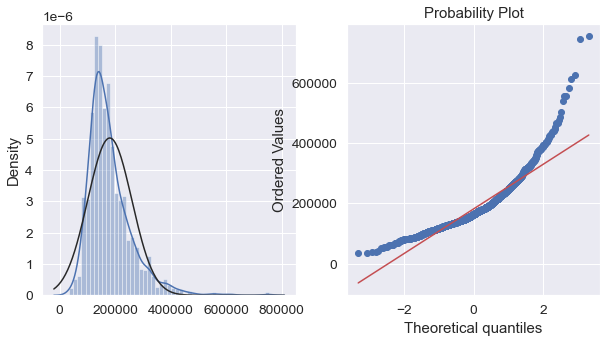

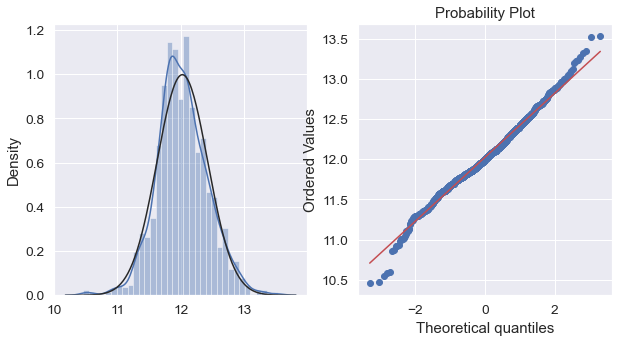

In [24]:
#Before plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data['SalePrice'], fit=norm)
stats.probplot(x=train_data['SalePrice'], plot=plt)
plt.show()

#After plots
train_data["SalePrice"] = np.log(train_data["SalePrice"]) #Applying log transformation on columns without zero values

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data['SalePrice'], fit=norm)
stats.probplot(x=train_data['SalePrice'], plot=plt)
plt.show()

Now we need to solve skeweness for the other features we plan on using.
- 'OverallQual'
- 'GrLivArea'
- 'GarageCars'
- 'TotalBsmtSF'
- 'FullBath'
- 'YearBuilt'
- 'SalePrice'

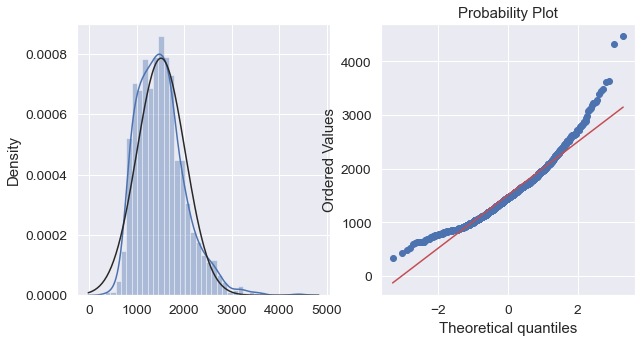

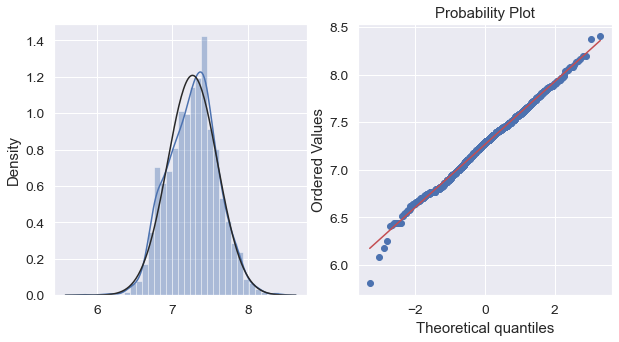

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data['GrLivArea'], fit=norm)
stats.probplot(x=train_data['GrLivArea'], plot=plt)
plt.show()

#After plots
train_data["GrLivArea"] = np.log(train_data["GrLivArea"]) #Applying log transformation on columns without zero values
test_data["GrLivArea"] = np.log(test_data["GrLivArea"]) 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data['GrLivArea'], fit=norm)
stats.probplot(x=train_data['GrLivArea'], plot=plt)
plt.show()

In [26]:
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
#sns.distplot(ax=axs[0], x=train_data['TotalBsmtSF'], fit=norm)
#stats.probplot(x=train_data['TotalBsmtSF'], plot=plt)
#plt.show()

The issue with the above is that we can't use log on 0 and there's a fair few 0 values. We could ignore the 0 values and use the remaining data but for now I think I will leave it as it is. There may be other ways to correct the skeweness but for now I will leave it.

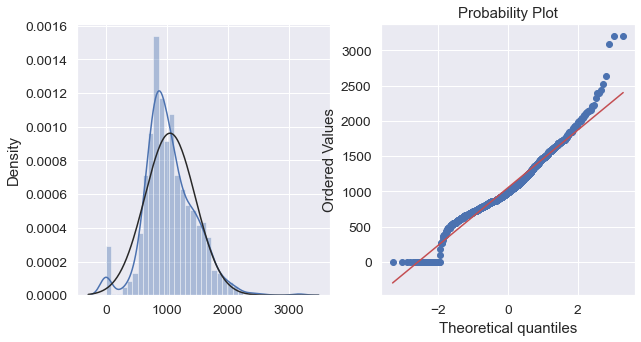

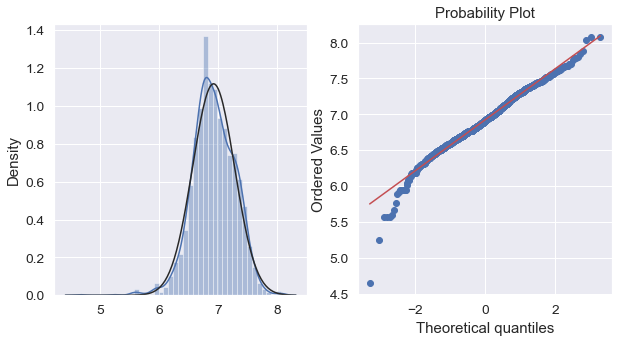

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data['TotalBsmtSF'], fit=norm)
stats.probplot(x=train_data['TotalBsmtSF'], plot=plt)
plt.show()

train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

test_data['HasBsmt'] = pd.Series(len(test_data['TotalBsmtSF']), index=test_data.index)
test_data['HasBsmt'] = 0 
test_data.loc[test_data['TotalBsmtSF']>0,'HasBsmt'] = 1

test_data.loc[test_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(ax=axs[0], x=train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
stats.probplot(x=train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)
plt.show()

## Dummy variables

In [28]:
train_data = pd.get_dummies(train_data)
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd

# Model
## Split the data

In [29]:
X = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'HasBsmt']]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

## Linear Regression

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
log_pred = model.predict(X_test)
pred = np.exp(log_pred) #inverse log on predicted SalePrice
print(model.score(X_test, y_test))

0.8541914753049822


## Stochastic Gradient Descent

In [31]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
log_pred = model.predict(X_test)
pred = np.exp(log_pred) #inverse log on predicted SalePrice
print(model.score(X_test, y_test))

0.8424807388275607


# Output

In [32]:
test_X = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'HasBsmt']]

model = LinearRegression()
model.fit(X_train, y_train)
log_pred = model.predict(test_X)
pred = np.exp(log_pred) #inverse log on predicted SalePrice

In [33]:
output_dic = {"Id": test_data["Id"], "SalePrice": pred}
output_df = pd.DataFrame(output_dic)
output_df.to_csv("submission.csv", index=False)

# Notes
1. After the first attempt, many values were predicted as infinite. This is probably due to the TotalBsmtSF. I will comment out what I had originally and separate the values 0 for not having a garden and x > 0 being for having a garden, then I can remove the 0's in TotalBsmtSF and add an additional boolean feature that specifies if it has a garden or not 
2. I applied the Data Processing to the test data and managed to remove the inf values from the predictions.
3. More extensive work could be done on this dataset to increase the accuracy of the data.